# Final Project Report

* Class: DS 5100
* Student Name: Olivia Byram
* Student Net ID: OCB3WV
* This URL: https://github.com/ocbyram/Monte-Carlo-Module

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/ocbyram/Monte-Carlo-Module

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import pandas as pd
import numpy as np
import random
from collections import Counter

class Die: 
    """Description: Creates a die. The die's purpose is to be rolled one or more times.
    All of the faces of the die are created with weight = '1'. The weight can be changed
    using the change_weight class. The faces of the die can be returned in a dataframe.

    Methods:
    - __init__(): This initializes the die (creates it) and sets the default weights
                    as 1.

    - change_weight(): This allows the user to change the weight of any of the die
                         faces.

    - roll(): This allows the user to roll the die and returns a list of outcomes.

    - state(): This returns a dataframe of die rolls and outcomes. 
    """
    
    def __init__(self,faces):
        
        """Purpose: creates a die with the faces input as the argument. Initializes
        default weight for each face as 1.0.

        Arguments: faces: a numpy array of die faces. Must be numpy array
        and values must be distinct.

        Outcome: a private dataframe with faces and weights.
        faces are in the index.
        """
        self.faces = faces
        if not isinstance(self.faces, np.ndarray):
            raise TypeError
        if not (len(self.faces) == len(set(self.faces))) == True:
            raise ValueError
        for each in self.faces:
            weight = 1.0
            self.weight = weight
        self.df = pd.DataFrame({'Weight':weight},index=faces)
            
    def change_weight(self,face_val, new_weight):
        """
        Purpose: A method to change the weight of a single face

        Arguments: face_val: the face value that the user would like to be changed (integer or string)
                new_weight: the new weight the user would like the face to have (integer)

        Outcome: changed weight for one face of the die
    
        """
        if face_val not in self.df.index:
            raise IndexError
        try:
            float(new_weight)
        except:
            raise TypeError
        self.df.loc[face_val, 'Weight'] = new_weight

    def roll(self, rolls = 1):
        """
        Purpose: a method to roll the die one or more times

        Arguments: rolls: how many times the die is to be rolled (integer). Defaults to 1.

        Outcome: a list of roll outcomes
    
        """
        sample = self.df.sample(n=rolls, replace=True, weights='Weight').index.tolist()
        return sample
        
    def state(self):
        """
        Purpose: a method to show die's current status

        Arguments: none

        Outcome: a copy of the private die dataframe
    
        """
        return self.df.copy()

class Game:
    """Description: A game where the user can roll one ore more die at a time.

    Methods:
    - __init__(): This initializes the list of instantiated die

    - play(): a play method so users can roll the die

    - show(): A method to show the user the results of the most recent play
    """
    def __init__(self, sim_faces):
        """
        Purpose: an initializer for the dice

        Arguments: sim_faces: a list of instantiated dice

        Outcome: returns the list of instantiated dice
    
        """
        self.sim_faces = sim_faces
            
    def play(self, num_rolls):
        """
        Purpose: a play method so users can roll the die

        Arguments: num_rolls: the number of times a user would like
                    the die to be rolled (integer)
            
        Outcome: a dataframe in wide format and the roll number
        as a named index, columns for each die number (using its list index
        as the column name), and the face rolled in that instance in each
        cell
    
        """
        outcomes = {i: die.roll(num_rolls) for i, die in enumerate(self.sim_faces)}
        self.game_df = pd.DataFrame(outcomes)
        self.game_df.index.name = "Roll Number"
        
    def show(self, form = 'wide'):
        """
        Purpose: A method to show the user the results of the most recent play

        Arguments: form: What form the user would like the dataframe in.
                default is wide, other option is narrow. If anything else
                is passed, there is a value error. (string)

        Outcome: a dataframe in either wide or narrow format of roll number,
                die number, and the face rolled in that instance.
    
        """
        if form == 'wide':
            return self.game_df.copy()
        elif form == 'narrow':
            self.narrow_df = self.game_df.melt(
                var_name = 'Die Number',
                value_name = 'Value',
                ignore_index = False)
            self.narrow_df.set_index(['Die Number'], append=True, inplace=True)
            return self.narrow_df
        else:
            raise ValueError

class Analyzer:
    """Description: An Analyzer object that takes the results of a single game and computes
                    various descriptive statistical properties about it

    Methods:
    - __init__(): initializes the game_object argument

    - jackpot(): counts the number of times all faces of die rolled are the same. 
                    Computes how many times there is a jackpot in a game.

    - face_counts(): Computes how many times a given face is rolled in each event

    - combos(): Computes the distinct combinations of faces rolled, along with their
                counts

    - permutations(): Computes the distinct permutations of faces rolled, along with their
                        counts
    """
    
    def __init__(self, game_object):
        """
        Purpose: initializes the game_object argument

        Arguments: game_object: a game object. Throws a `ValueError` if
                    the passed value is not a Game object.

        Outcome: an instantiated game object
    
        """
        if not isinstance(game_object, Game):
            raise ValueError
        self.game_object = game_object
        self.roll_result = game_object.show()

    def jackpot(self):
        """
        Purpose: counts the number of times all faces of die rolled are the same. 
                    Computes how many times there is a jackpot in a game.
    
        Arguments: none
    
        Outcome: an integer with the number of times a jackpot was rolled in a game
        
        """
        jackpots = self.roll_result.apply(lambda row: row.nunique() == 1, axis=1).sum()
        return int(jackpots)

    def face_counts(self):
        """
        Purpose: Computes how many times a given face is rolled in each event
    
        Arguments: none
    
        Outcome: a dataframe of results with an index of the roll number, face values as
                    columns, and count values in the cells
        
        """
        counts = self.roll_result.apply(lambda row: row.value_counts(), axis=1)
        counts.fillna(0, inplace=True)
        return counts
        
    def combos(self):
        """
        Purpose: Computes the distinct combinations of faces rolled, along with their
                    counts
    
        Arguments: none
    
        Outcome: a dataframe of results with a MultiIndex of distinct combinations
                    and a column for the associated counts
        
        """
        cols = self.roll_result.columns.difference(['id']).tolist()
        self.df = self.roll_result.groupby(cols, sort=True).size().reset_index(name='Counts')
        self.df=self.df.set_index(self.df.columns.difference(['Counts'],sort=True).tolist())
        return self.df
        
    def permutations(self):
        """
        Purpose: Computes the distinct permutations of faces rolled, along with their
                        counts
    
        Arguments: none
    
        Outcome: a dataframe of results with a MultiIndex of distinct permutations
                    and a column for the associated counts
        
        """
        self.tups = []
        self.tup_list = []
        for index, row in self.roll_result.iterrows():
            self.tups.append(tuple(row))
        counts = Counter(self.tups)
        self.df = pd.DataFrame(counts.items(), columns=['Permutation', 'Count'])
        tup_len = len(self.tups[0])
        for i in range(0,tup_len):
            self.tup_list.append(i)
        self.df[self.tup_list] = pd.DataFrame(self.df['Permutation'].tolist(), index=self.df.index)
        self.df.drop('Permutation', axis=1, inplace=True)
        self.df=self.df.set_index(self.df.columns.difference(['Count'],sort=False).tolist())
        return self.df
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import pandas as pd
import numpy as np
import random
from collections import Counter
from MonteCarlo import Die, Game, Analyzer

import unittest

class DieTestSuite(unittest.TestCase):
    
    def test_init(self):
        DieTest = Die(np.array([1,2,3,4,5,6]))
        test = isinstance(DieTest, Die)
        message = "Die was not created"
        self.assertTrue(test, message)

    def test_weight(self):
        DieTest2 = Die(np.array([1,2,3,4,5,6]))
        DieTest2.change_weight(1,5)
        test2 = DieTest2.state().loc[1, 'Weight'] == 5
        message = "Weight of die face was not changed"
        self.assertTrue(test2, message)

    def test_roll(self):
        DieTest3 = Die(np.array([1,2,3,4,5,6]))
        test3 = isinstance(DieTest3.roll(10),list)
        message = "This is not a list"
        self.assertTrue(test3, message)

    def test_state(self):
        DieTest4 = Die(np.array([1,2,3,4,5,6]))
        test4 = isinstance(DieTest4.state(), pd.DataFrame)
        message = "This is not a dataframe"
        self.assertTrue(test4, message)

class GameTestSuite(unittest.TestCase):
    
    def test_init(self):
        DieTest = Die(np.array([1,2,3,4,5,6]))
        GameTest = Game([DieTest])
        test = isinstance(GameTest, Game)
        message = "Game was not initialized"
        self.assertTrue(test, message)

    def test_play(self):
        DieTest2 = Die(np.array([1,2,3,4,5,6]))
        GameTest = Game([DieTest2])
        GameTest.play(10)
        show_df = GameTest.show()
        test2 = isinstance(show_df, pd.DataFrame)
        message = "This is not a dataframe"
        self.assertTrue(test2, message)

    def test_show(self):
        DieTest3 = Die(np.array([1,2,3,4,5,6]))
        GameTest2 = Game([DieTest3])
        GameTest2.play(10)
        show_df2 = GameTest2.show()
        test3 = isinstance(show_df2, pd.DataFrame)
        message = "This is not a dataframe"
        self.assertTrue(test3, message)

class AnalyzerTestSuite(unittest.TestCase):
    
    def test_init(self):
        DieTest = Die(np.array([1,2,3,4,5,6]))
        GameTest = Game([DieTest])
        GameTest.play(10)
        AnalyzeTest = Analyzer(GameTest)
        test = isinstance(AnalyzeTest, Analyzer)
        message = "Analyze was not initialized"
        self.assertTrue(test, message)
        
    def test_jackpot(self):
        DieTest2 = Die(np.array([1,2,3,4,5,6]))
        GameTest2 = Game([DieTest2])
        GameTest2.play(10)
        AnalyzeTest2 = Analyzer(GameTest2)
        jackpot = AnalyzeTest2.jackpot()
        test2 = isinstance(jackpot, int)
        message = "This is not an integer"
        self.assertTrue(test2, message)
        
    def test_face_counts(self):
        DieTest3 = Die(np.array([1,2,3,4,5,6]))
        GameTest3 = Game([DieTest3])
        GameTest3.play(10)
        AnalyzeTest3 = Analyzer(GameTest3)
        counts = AnalyzeTest3.face_counts()
        test3 = isinstance(counts, pd.DataFrame)
        message = "This is not a dataframe"
        self.assertTrue(test3, message)

    def test_combos(self):
        DieTest4 = Die(np.array([1,2,3,4,5,6]))
        GameTest4 = Game([DieTest4])
        GameTest4.play(10)
        AnalyzeTest4 = Analyzer(GameTest4)
        df = AnalyzeTest4.combos()
        test4 = isinstance(df, pd.DataFrame)
        message = "This is not a dataframe"
        self.assertTrue(test4, message)
        
    def test_permutations(self):
        DieTest5 = Die(np.array([1,2,3,4,5,6]))
        GameTest5 = Game([DieTest5])
        GameTest5.play(10)
        AnalyzeTest5 = Analyzer(GameTest5)
        df2 = AnalyzeTest5.permutations()
        test5 = isinstance(df2, pd.DataFrame)
        message = "This is not a dataframe"
        self.assertTrue(test5, message)
        
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
oliviabyram@Olivias-MacBook-Air Monte-Carlo % python3 -m unittest montecarlo_test.py -v
test_combos (montecarlo_test.AnalyzerTestSuite.test_combos) ... ok
test_face_counts (montecarlo_test.AnalyzerTestSuite.test_face_counts) ... ok
test_init (montecarlo_test.AnalyzerTestSuite.test_init) ... ok
test_jackpot (montecarlo_test.AnalyzerTestSuite.test_jackpot) ... ok
test_permutations (montecarlo_test.AnalyzerTestSuite.test_permutations) ... ok
test_init (montecarlo_test.DieTestSuite.test_init) ... ok
test_roll (montecarlo_test.DieTestSuite.test_roll) ... ok
test_state (montecarlo_test.DieTestSuite.test_state) ... ok
test_weight (montecarlo_test.DieTestSuite.test_weight) ... ok
test_init (montecarlo_test.GameTestSuite.test_init) ... ok
test_play (montecarlo_test.GameTestSuite.test_play) ... ok
test_show (montecarlo_test.GameTestSuite.test_show) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.004s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import Monte_Carlo.MonteCarlo

Welcome to my package! This is my DS 5100 Final Project!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(Monte_Carlo.MonteCarlo)

Help on module Monte_Carlo.MonteCarlo in Monte_Carlo:

NAME
    Monte_Carlo.MonteCarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game

    class Analyzer(builtins.object)
     |  Analyzer(game_object)
     |
     |  Description: An Analyzer object that takes the results of a single game and computes
     |                  various descriptive statistical properties about it
     |
     |  Methods:
     |  - __init__(): initializes the game_object argument
     |
     |  - jackpot(): counts the number of times all faces of die rolled are the same.
     |                  Computes how many times there is a jackpot in a game.
     |
     |  - face_counts(): Computes how many times a given face is rolled in each event
     |
     |  - combos(): Computes the distinct combinations of faces rolled, along with their
     |              counts
     |
     |  - permutations(): Computes the distinct permutations of faces rolled, along with their
     |                     

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```
oliviabyram@Olivias-MacBook-Air Monte-Carlo-Module % pip install .
Processing /Users/oliviabyram/Monte-Carlo-Module
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: MonteCarlo
  Building wheel for MonteCarlo (setup.py) ... done
  Created wheel for MonteCarlo: filename=MonteCarlo-0.1-py3-none-any.whl size=8822 sha256=72846f365e203cc8f5de14df4b8c5cd7cf8496574d5c0c50369329143484a7f4
  Stored in directory: /Users/oliviabyram/Library/Caches/pip/wheels/25/f5/4c/18b39c4ab2defc0ed9b049fb03b2dbc16fb112933d9c8af87f
Successfully built MonteCarlo
Installing collected packages: MonteCarlo
Successfully installed MonteCarlo-0.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [8]:
from Monte_Carlo.MonteCarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd

In [11]:
fair_coin = Die(np.array(["H", "T"]))
unfair_coin = Die(np.array(["H", "T"]))
unfair_coin.change_weight('H', 5)
print(fair_coin.state())
print(unfair_coin.state())

   Weight
H     1.0
T     1.0
   Weight
H     5.0
T     1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [12]:
fair_coin1 = Die(np.array(["H", "T"]))
fair_coin2 = Die(np.array(["H", "T"]))

obj = Game([fair_coin1,fair_coin2])
obj.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [13]:
fair_coin1 = Die(np.array(["H", "T"]))
unfair_coin = Die(np.array(["H", "T"]))
unfair_coin.change_weight('H', 5)

new_obj = Game([fair_coin1,unfair_coin, unfair_coin])
new_obj.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [14]:
game1 = Analyzer(obj)
game2 = Analyzer(new_obj)

game1_jackpots = game1.jackpot()

game2_jackpots = game2.jackpot()

print(game1_jackpots)
print(game2_jackpots)

492
359


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [15]:
game1_freq = game1_jackpots/1000
game2_freq = game2_jackpots/1000

print(game1_freq)
print(game2_freq)

0.492
0.359


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Proportion of Jackpots for Fair and Unfair Games')

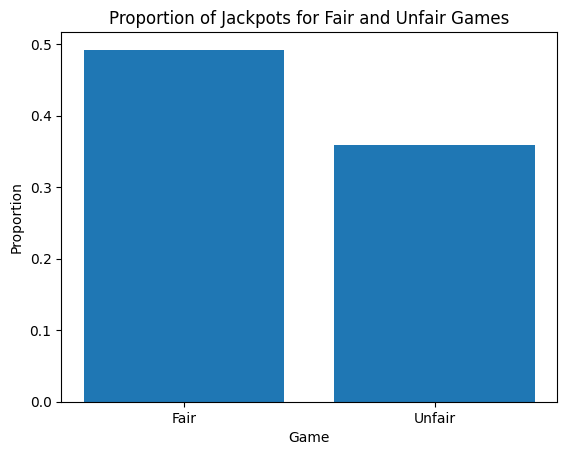

In [16]:
import matplotlib.pyplot as plt

Games = ['Fair', 'Unfair']
Proportions = [game1_freq, game2_freq]
plt.bar(Games, Proportions)
plt.xlabel('Game')
plt.ylabel('Proportion')
plt.title('Proportion of Jackpots for Fair and Unfair Games')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [17]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [18]:
die1.change_weight(6, 5)
die1.state()

,Weight
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [19]:
die2.change_weight(1, 5)
die2.state()

,Weight
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [20]:
fair_obj = Game([die3,die3,die3,die3,die3])
fair_obj.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [21]:
unfair_obj = Game([die1,die2,die3,die3,die3])
unfair_obj.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

0.0007
0.001


Text(0.5, 1.0, 'Proportion of Jackpots for Fair and Unfair Games')

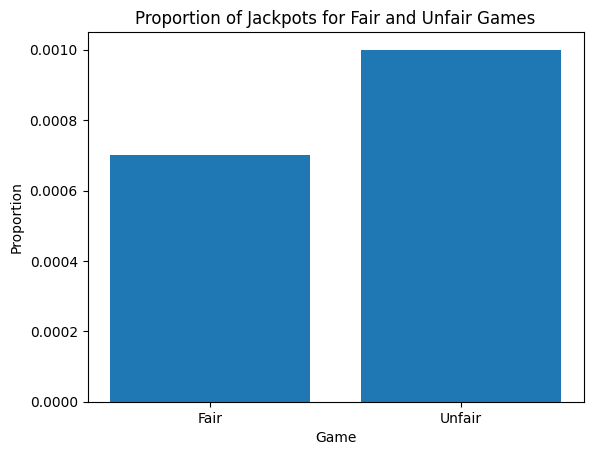

In [22]:
game1 = Analyzer(fair_obj)
game2 = Analyzer(unfair_obj)

game1_jackpots = game1.jackpot()

game2_jackpots = game2.jackpot()

game1_freq = game1_jackpots/10000
game2_freq = game2_jackpots/10000

print(game1_freq)
print(game2_freq)

Games = ['Fair', 'Unfair']
Proportions = [game1_freq, game2_freq]
plt.bar(Games, Proportions)
plt.xlabel('Game')
plt.ylabel('Proportion')
plt.title('Proportion of Jackpots for Fair and Unfair Games')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [23]:
letters = pd.read_csv('english_letters.txt', header = None, sep = ' ')
letter_array = np.array(letters[0])
initial_letter = Die(letter_array)

for letter, weight in zip(letters[0], letters[1]):
    initial_letter.change_weight(letter, weight)

initial_letter.state()

,Weight
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [24]:
new_game = Game([initial_letter, initial_letter, initial_letter, initial_letter])
new_game.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [25]:
words = pd.read_csv('scrabble_words.txt', header = None)
analyze_game = Analyzer(new_game)
analyze_game.permutations()

df = analyze_game.permutations()
df.index = df.index.map(lambda x: ''.join(x))

count = 0

for index, row in df.iterrows():
    if index in words[0].values:
        count += row['Count']

permutations = len(df)
actual_english = count

print(actual_english)

44


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [26]:
new_game2 = Game([initial_letter, initial_letter, initial_letter, initial_letter, initial_letter])
new_game2.play(1000)

words = pd.read_csv('scrabble_words.txt', header = None)
analyze_game2 = Analyzer(new_game2)
analyze_game2.permutations()

df2 = analyze_game2.permutations()
df2.index = df2.index.map(lambda x: ''.join(x))

count2 = 0

for index, row in df2.iterrows():
    if index in words[0].values:
        count2 += row['Count']

permutations2 = len(df2)
actual_english2 = count2

print(actual_english2)

if actual_english > actual_english2:
    print("Parameter with 4 dice produces more actual words.")
else:
    print("Parameter with 5 dice produces more actual words.")

11
Parameter with 4 dice produces more actual words.
